### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. 
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, auc, confusion_matrix, recall_score, precision_score
%matplotlib inline

In [2]:
titanic = pd.read_csv("data/titanic.csv")

#### 1. View the first five rows of the dataset 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Run describe() to get basic descriptive statistics on the dataset 

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3. Are there missing values in the dataset? Run count() to view the number of values for each column. Try info() as well which provides additional information about the dataframe.  

In [9]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Our goal is to predict whether a passenger survived on the Titanic. Let's start by building a single variable logistic model to try and predict survivability. 

#### 4. Generate a boxplot using Seaborn (sns) to visualize the distribution of fare against survived 

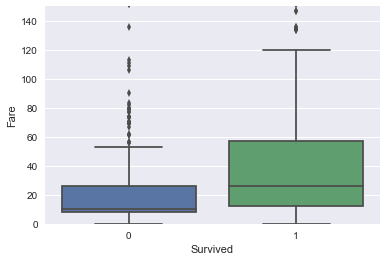

In [11]:
sns.boxplot("Survived", "Fare", data=titanic)
plt.ylim(0,150)
plt.show()

#### 5. Using LogisticRegression from Sklearn, create a logistic regression model predicting survived based on fare (use the default LogisticRegression parameters)

In [12]:
lm = LogisticRegression().fit(titanic[["Fare"]], titanic["Survived"])

#### 6. What are the coefficients of the model? 

In [13]:
print(lm.coef_)
print(lm.intercept_)

[[ 0.01506685]]
[-0.93290045]


#### 7. What is the accuracy of this model? 

In [14]:
accuracy_score(titanic["Survived"], lm.predict(titanic[["Fare"]]))

0.66554433221099885

#### 8. Using sns.barplot, plot sex against survived for the titanic dataset

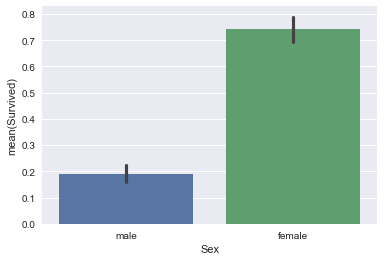

In [15]:
sns.barplot("Sex", "Survived", data=titanic)

#### 9. Create another model predicted survived on fare and sex. Recall that sex is a categorical value and that dummy variables need to be created 

In [16]:
sex_dummies = pd.get_dummies(titanic["Sex"], drop_first=True)
titanic = titanic.join(sex_dummies)

In [17]:
factors = ["Fare", "male"]
lm2 = LogisticRegression().fit(titanic[factors], titanic["Survived"])

In [18]:
lm2.coef_

array([[ 0.01133287, -2.34491878]])

#### 10. What is the accuracy of this new model? 

In [19]:
accuracy_score(titanic["Survived"], lm2.predict(titanic[factors]))

0.78226711560044893

#### 11. What are the precision and recall scores for this model?

In [21]:
precision_score(titanic["Survived"], lm2.predict(titanic[factors]))

0.72981366459627328

In [22]:
recall_score(titanic["Survived"], lm2.predict(titanic[factors]))

0.6871345029239766

#### Bonus: Plot the AUC Curve for the model

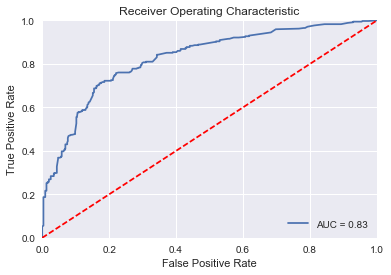

In [24]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lm2.predict_proba(titanic[factors])
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(titanic['Survived'], preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()